In [122]:
import generate_poems as gen_poem
import preprocessing
import metrics
import tensorflow as tf
import importlib as imp
imp.reload(gen_poem)

<module 'generate_poems' from '/gpfs/data/rsingh47/anair27/misc/dl-final/csci1470-final-project-POE-M/code/generate_poems.py'>

In [115]:
corpus, _ = preprocessing.get_corpus()

In [116]:
tokenizer = preprocessing.get_tokenizer(corpus)

### Define seeds and poem starters

In [125]:
SEEDS = [13, 55]

In [131]:
STARTERS = ["flames", "cold", "you are", "light a"]

# Model 1: Naive N-Gram

In [111]:
naive_n_gram_model = tf.keras.models.load_model("models/three_architectures/naive_n_gram/model", custom_objects = {"Perplexity": metrics.Perplexity})

In [61]:
for starter in STARTERS:
    print("Poems generated with \"" + starter + "\"" + "...")
    print("----------")
    for seed in SEEDS:
        print(gen_poem.generate_poem_naive_n_grams(naive_n_gram_model, tokenizer, starter, seed= seed))
        print("----------")
    print("\n")

Poems generated with "flames"...
----------
flames danced and
ten breathing nothing bounty
enough to fix this
----------
flames through the rain
i see you your head so so
still have dammit
----------
flames so i still
see the words i am in the mind
i have to do
----------
flames danced of
a fight from all the whole page has
been seeing shit where have i
----------
flames in the sun
a new friend the days i have cold
i have all a
----------


Poems generated with "i go with the"...
----------
i go with the roses
lingers august of hidden
of winter soon dim
----------
i go with the end
of a dead that day and yet
you can take its
----------
i go with the wind
and i am in the summer
you love you be winter
----------
i go with the storm
softened off with the pond
a frog back in her
----------
i go with the night
i have a haiku a
haiku i have to
----------


Poems generated with "he will eat a"...
----------
he will eat a demon
came through those moments
penetrated filled
----------
he will ea

# Model 2: Line by Line

In [112]:
lbl_model_1 = tf.keras.models.load_model("models/three_architectures/line_by_line/model_1", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})
lbl_model_2 = tf.keras.models.load_model("models/three_architectures/line_by_line/model_2", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})
lbl_model_3 = tf.keras.models.load_model("models/three_architectures/line_by_line/model_3", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})

In [62]:
for starter in STARTERS:
    print("Poems generated with \"" + starter + "\"" + "...")
    print("----------")
    for seed in SEEDS:
        print(gen_poem.generate_poem_line_by_line(lbl_model_1, lbl_model_2, lbl_model_3, tokenizer, starter, seed = seed))
        print("----------")
    print("\n")

Poems generated with "flames"...
----------
flames danced in
such a steaming pitter patter
on black blood again
----------
flames bright and dancing
black he turns on me high now
they say an empty
----------
flames people to
reveal like me and one day
they probably bother
----------
flames bright and dancing
eventually become grey
eyes modesty then
----------
flames red and and
it the eyes the sky is the new
crack in the stars time to
----------


Poems generated with "i go with the"...
----------
i go with the fringe deep
without held supporting in
another hard wake of
----------
i go with the fringe time home by
he is not gay he hung up
not be not you see you
----------
i go with the cat
the never never a simple looks
your back well have down
----------
i go with the fringe rain
they said is what you up from
no more time can
----------
i go with the heart
the autumn sun is on my
little haiku of
----------


Poems generated with "he will eat a"...
----------
he will eat a flow
relentl

# Model 3: Line by Line with Stops

In [113]:
lbl_s_model_1 = tf.keras.models.load_model("models/three_architectures/line_by_line_with_stops/model_1", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})
lbl_s_model_2 = tf.keras.models.load_model("models/three_architectures/line_by_line_with_stops/model_2", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})
lbl_s_model_3 = tf.keras.models.load_model("models/three_architectures/line_by_line_with_stops/model_3", 
                                                custom_objects = {"Perplexity": metrics.Perplexity})

In [114]:
stop_corpus, _ = preprocessing.get_corpus(new_line_tokens=True)
stop_tokenizer = preprocessing.get_tokenizer(stop_corpus)

In [63]:
for starter in STARTERS:
    print("Poems generated with \"" + starter + "\"" + "...")
    print("----------")
    for seed in SEEDS:
        print(gen_poem.generate_poem_line_by_line_with_stops(lbl_s_model_1, lbl_s_model_2, lbl_s_model_3, stop_tokenizer, starter, seed = seed))
        print("----------")
    print("\n")

Poems generated with "flames"...
----------
flames danced in his eyes 
it snow starts to many litecoin 
and hopes slush to hot girl 
----------
flames bright and dancing 
eventually minutes 
their last flow like and soul 
----------
flames bright and dancing 
eventually minutes 
new life up distracted 
----------
flames bright and dancing 
eventually minutes 
their last flow friends and gone 
----------
flames bright and dancing 
as the night is just an night 
heart of no white day 
----------


Poems generated with "i go with the"...
----------
i go with the fringe 
to see what there is an moment 
will not do yours 
----------
i go with the haze 
the day of the horizon 
it will fuck you yet 
----------
i go with the fight 
to i like a little haiku 
i will never hear 
----------
i go with the fringe 
to see what no more will to say 
dont touch to kill her 
----------
i go with the ice 
she grabbed the back of my head 
and not you i dont love 
----------


Poems generated with "he will 

# Create a poem book.
##### Generates a markdown file with all the poems.

In [132]:
# CREATE POEM BOOK
def create_poem_book(output):
    with open(output+".md", 'w') as f:
        f.write("# POEM BOOK\n\n\n")
        f.write(f"##### Seeds used: {SEEDS} \n")
        f.write(f"##### Starters used: {STARTERS} \n\n")
        f.write("\n---------------\n")
        f.write("## Model 1: Naive N-Gram\n")
        # f.write("---------------\n")
        for starter in STARTERS:
            f.write("### Poems generated with \"" + starter + "\"" + "...\n")
            #f.write("----------\n")
            for seed in SEEDS:
                f.write(gen_poem.generate_poem_naive_n_grams(naive_n_gram_model, tokenizer, starter, seed= seed, markdown = True))
                f.write("\n\n")
            f.write("\n")
        f.write("\n---------------\n")
        f.write("## Model 2: Line by Line\n")
        # f.write("---------------\n")
        for starter in STARTERS:
            f.write("### Poems generated with \"" + starter + "\"" + "...\n")
            #f.write("----------\n")
            for seed in SEEDS:
                f.write(gen_poem.generate_poem_line_by_line(lbl_model_1, lbl_model_2, lbl_model_3, tokenizer, starter, seed = seed, markdown = True))
                f.write("\n\n")
            f.write("\n")
        f.write("\n---------------\n")
        f.write("## Model 3: Line by Line with stops\n")
        for starter in STARTERS:
            f.write("### Poems generated with \"" + starter + "\"" + "...\n")
            # f.write("----------\n")
            for seed in SEEDS:
                f.write(gen_poem.generate_poem_line_by_line_with_stops(lbl_s_model_1, lbl_s_model_2, lbl_s_model_3, stop_tokenizer, starter, seed = seed, markdown = True))
                f.write("\n\n")
            f.write("\n")

In [133]:
create_poem_book("poem_book")

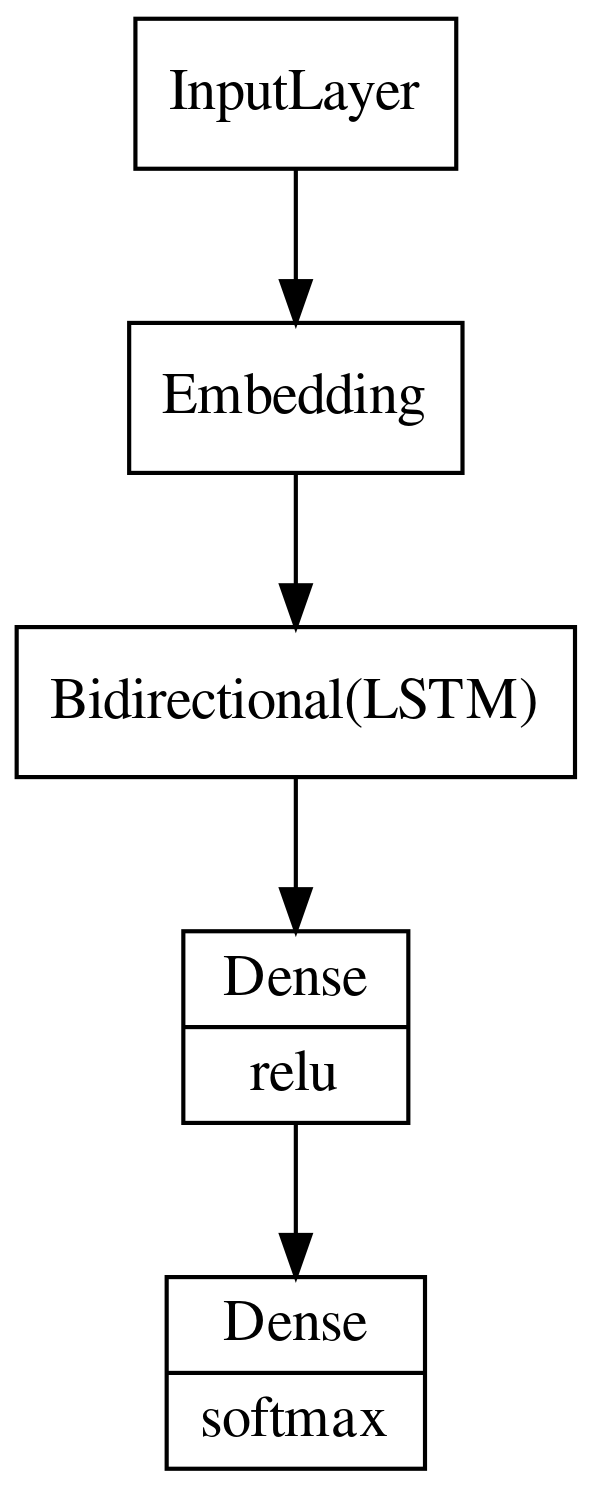

In [104]:
tf.keras.utils.plot_model(naive_n_gram_model, show_layer_names=False, show_layer_activations=True, dpi = 300)

In [6]:
import joblib

In [9]:
h1 = joblib.load("/users/anair27/data/anair27/misc/dl-final/csci1470-final-project-POE-M/code/models/three_architectures/line_by_line/history_1")
h2 = joblib.load("/users/anair27/data/anair27/misc/dl-final/csci1470-final-project-POE-M/code/models/three_architectures/line_by_line/history_2")
h3 = joblib.load("/users/anair27/data/anair27/misc/dl-final/csci1470-final-project-POE-M/code/models/three_architectures/line_by_line/history_3")

Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-05-03 00:42:36     37040644
config.json                                    2023-05-03 00:42:36         3418
metadata.json                                  2023-05-03 00:42:36           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......embedding
.........vars
............0
...metrics
......mean
.........vars
.......

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(rc={"figure.dpi":300})
sns.set_theme(style='white')

In [136]:
def plot_convergence(history1, history2, history3):
    history1 = history1.history
    history2 = history2.history
    history3 = history3.history
    f, ax = plt.subplots(nrows= 1, ncols = 2, figsize = (10, 5))
    ax[0].set(title="Accuracy")
    sns.lineplot(data=history1["accuracy"], ax=ax[0], label="L1")
    sns.lineplot(data=history2["accuracy"], ax=ax[0], label="L2")
    sns.lineplot(data=history3["accuracy"], ax=ax[0], label="L3")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Accuracy")
    
    ax[1].set(title="Perplexity")
    sns.lineplot(data=history1["Perplexity"], ax=ax[1], label="L1")
    sns.lineplot(data=history2["Perplexity"], ax=ax[1], label="L2")
    sns.lineplot(data=history3["Perplexity"], ax=ax[1], label="L3")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Perplexity")
    ax[1].set_yscale("log")
    
    f.suptitle("Line by line (with stops) model ")
#     # create a single line plot for accuracy and perplexity
#     f, ax = plt.subplots(nrows= 1, ncols = 2, figsize = (10, 4))
#     ax[0].set(title="Accuracy")
#     ax[1].set(title="Perplexity")
#     sns.lineplot(data=accuracy_values, ax=ax[0])
#     sns.lineplot(data=perplexity_values, ax=ax[1])
    
    # add legend and labels

In [134]:
hs1 = joblib.load("/users/anair27/data/anair27/misc/dl-final/csci1470-final-project-POE-M/code/models/three_architectures/line_by_line_with_stops/history_1")
hs2 = joblib.load("/users/anair27/data/anair27/misc/dl-final/csci1470-final-project-POE-M/code/models/three_architectures/line_by_line_with_stops/history_2")
hs3 = joblib.load("/users/anair27/data/anair27/misc/dl-final/csci1470-final-project-POE-M/code/models/three_architectures/line_by_line_with_stops/history_3")

Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-05-03 18:47:18     37042792
config.json                                    2023-05-03 18:47:16         3420
metadata.json                                  2023-05-03 18:47:16           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......embedding
.........vars
............0
...metrics
......mean
.........vars
.......

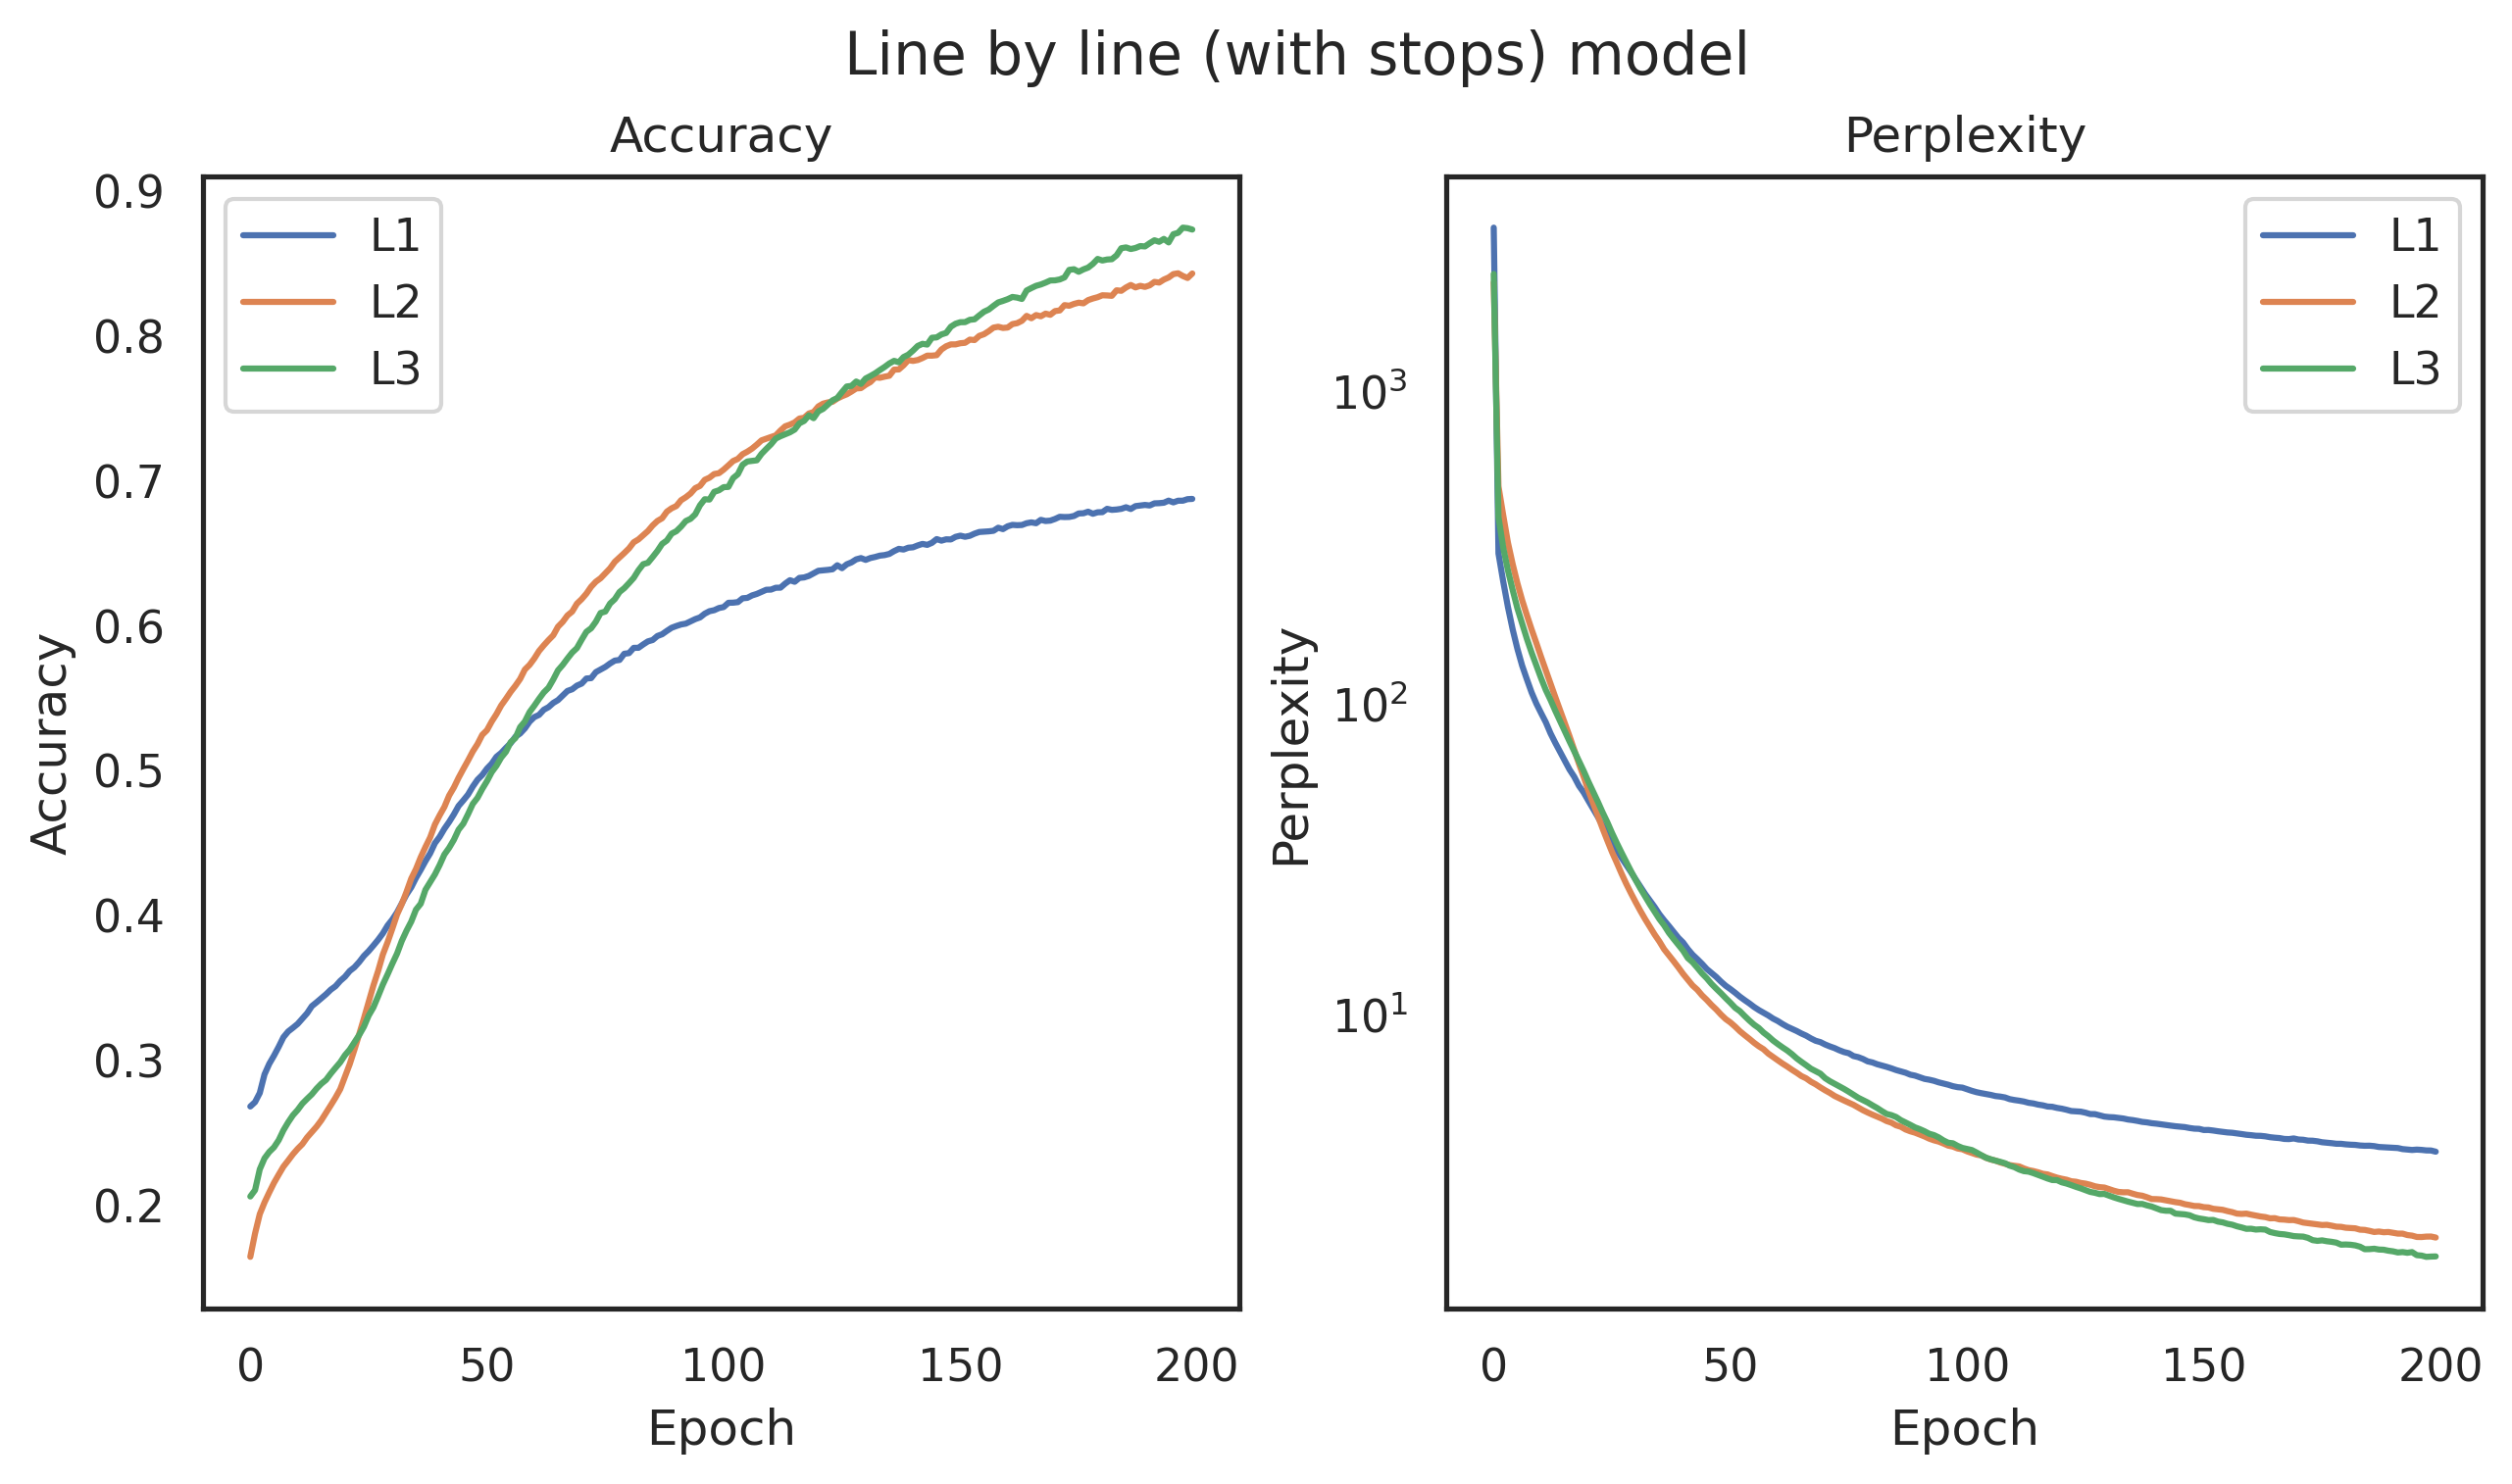

In [137]:
plot_convergence(hs1, hs2, hs3)

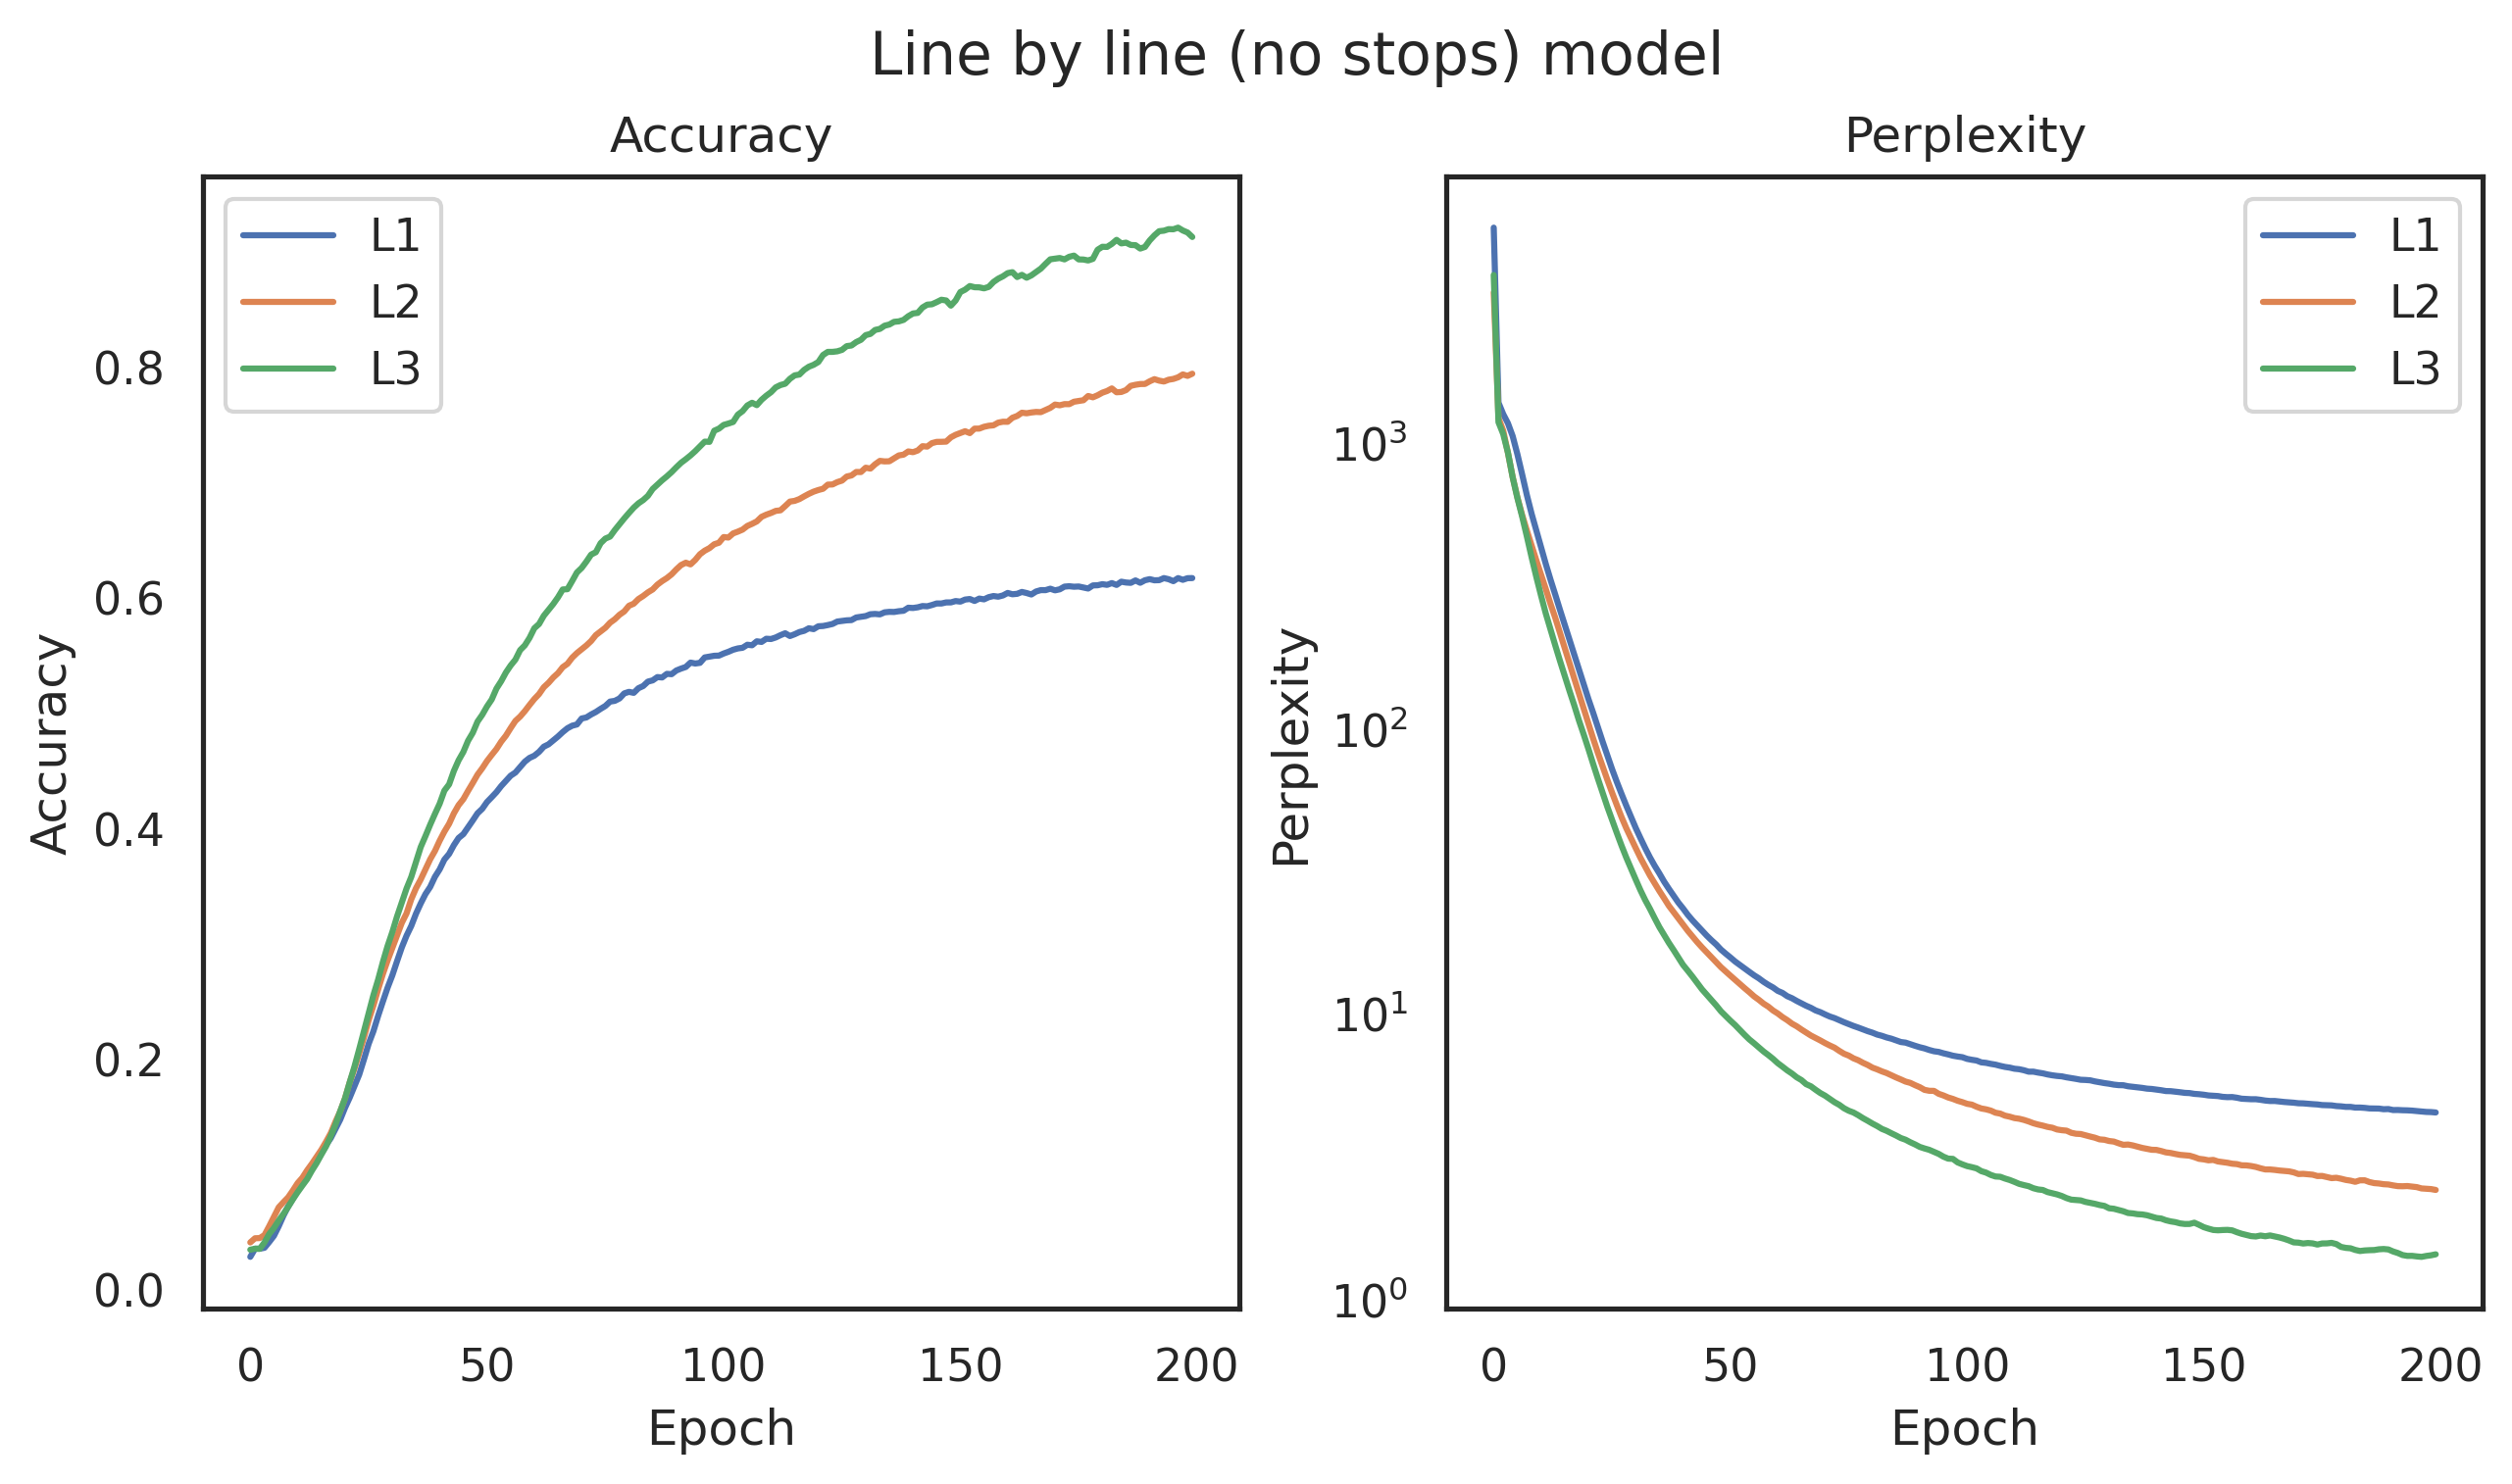

In [46]:
plot_convergence(h1, h2, h3)

In [49]:
model = tf.keras.models.load_model("models/three_architectures/naive_n_gram/model", 
                                    custom_objects = {"Perplexity": metrics.Perplexity})

In [50]:
import preprocessing

In [51]:
corpus, _ = preprocessing.get_corpus()

In [53]:
tokenizer = preprocessing.get_tokenizer(corpus)

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get the embedding layer from the model
embedding_layer = lbl_model_3.layers[0]

# Get the learned weights of the embedding layer
weights = embedding_layer.get_weights()[0]

# Create a dictionary mapping from word index to word
word_index = tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Select a subset of words to visualize
num_words = 2000
selected_words = list(reverse_word_index.values())[:num_words]
# Get the corresponding embedding vectors for the selected words
selected_word_indexes = [word_index[word] for word in selected_words]
selected_embeddings = weights[selected_word_indexes]

# Apply dimensionality reduction to the embedding vectors using t-SNE
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
reduced_embeddings = tsne.fit_transform(selected_embeddings)


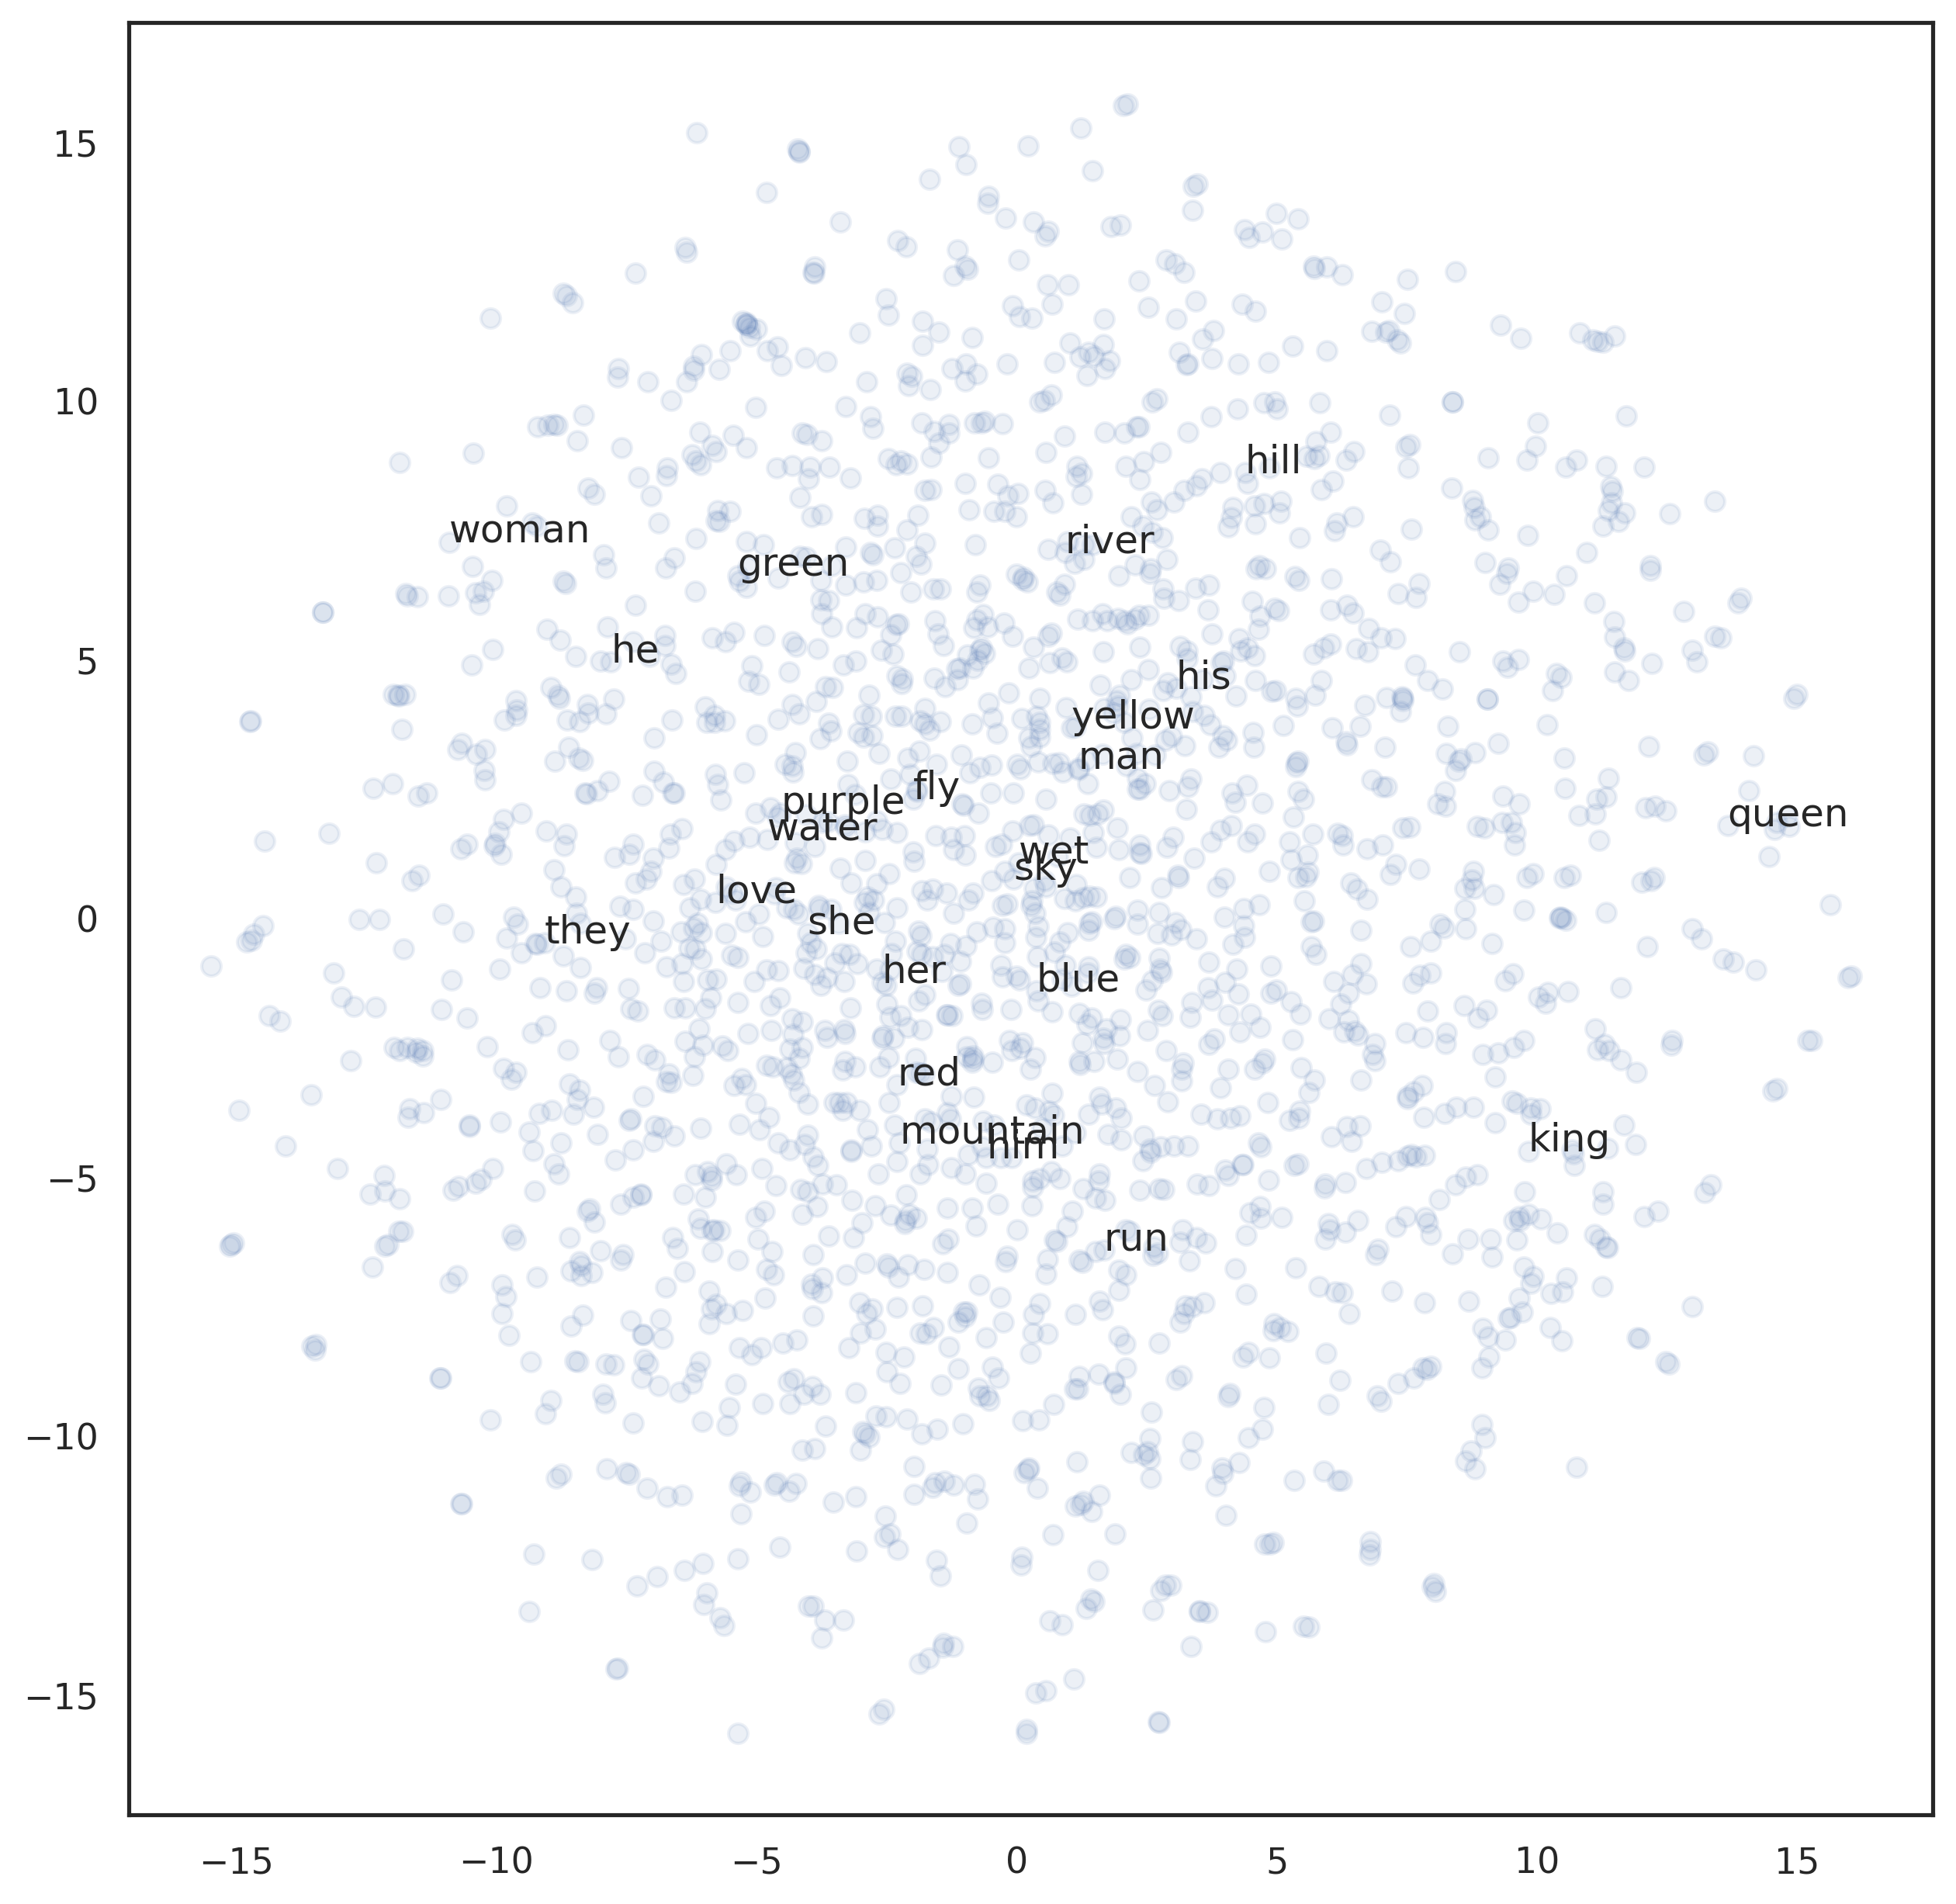

In [100]:

# Create a scatter plot of the reduced embeddings
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha = 0.1)

labelled_words = ["love", "he", "his", "she", "her", "him", "woman", "man", "they", "green", "red", "blue", "purple", "yellow", "sky", "hill", "mountain", "river", "king", "water", "wet", "fly", "run", "queen"]
for w in labelled_words:
    w_index = word_index[w]
    ax.annotate(w, (reduced_embeddings[w_index, 0], reduced_embeddings[w_index, 1]))
    


# Display the plot
plt.show()